In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# 기존 데이터
df_batter = pd.read_csv("야수전체데이터_ver1.csv")

In [2]:
df_batter = df_batter[df_batter['FA년도']> 2016]

In [3]:
df_batter['FA년도'].unique()

array([2017, 2018, 2019, 2020, 2024, 2021, 2022, 2023], dtype=int64)

In [4]:
df_train = df_batter[~(df_batter['구분'] == 'FA 1년차')]

In [10]:


# 2. 성과 지표 평균 처리
performance_cols = ['공격WAR', '루타', '타점', 'WPA+','득점','WPA','타석수','wRC+','안타','타수','2루타','홈런','국대출전횟수']  # 평균 낼 컬럼들로 수정

df = df_train.groupby(['선수명','FA년도'])[performance_cols].mean().reset_index()

df
# 3. 평균 내지 않는 컬럼(문자열 등) 처리 → 첫 값 가져오기
#extra_cols = ['K/9', 'BB/9', 'FIP','피장타율' ]  # 추가하고 싶은 컬럼
#extra_info = df_relief.groupby('선수명')[extra_cols].last().reset_index()

# 4. 병합
#df = (
#    performance_avg
#    .merge(df_batter, on='선수명', how='left')
#    .merge(extra_info, on='선수명', how='left')
#)

,선수명,FA년도,공격WAR,루타,타점,WPA+,득점,WPA,타석수,wRC+,안타,타수,2루타,홈런,국대출전횟수
0,강민호,2018,4.720000,224.000000,75.333333,11.043333,63.333333,3.606667,477.00,137.500000,123.666667,405.666667,22.000000,25.666667,8.0
1,강민호,2022,2.706667,169.000000,57.666667,8.010000,45.666667,0.860000,416.00,106.933333,100.333333,369.000000,18.666667,16.666667,8.0
2,강한울,2024,0.462500,62.000000,18.250000,3.262500,24.750000,-0.545000,218.00,82.300000,52.250000,191.500000,6.750000,0.500000,0.0
3,고종욱,2024,0.212500,77.750000,24.250000,4.305000,24.250000,0.200000,221.75,89.025000,58.750000,207.000000,9.500000,2.500000,0.0
4,구자욱,2022,3.107500,240.250000,80.250000,11.572500,85.750000,3.342500,543.75,119.700000,147.250000,485.500000,27.500000,18.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,한유섬,2022,2.540000,198.750000,73.250000,9.200000,63.750000,1.932500,453.50,127.350000,105.500000,387.000000,18.500000,24.750000,0.0
92,허경민,2021,2.160000,183.500000,59.250000,8.190000,69.000000,0.465000,506.50,108.025000,136.000000,449.250000,25.500000,6.000000,4.0
93,허도환,2022,0.055000,20.250000,8.250000,1.220000,4.250000,0.090000,76.00,66.100000,14.750000,64.750000,2.500000,1.000000,0.0
94,황재균,2017,2.927500,245.750000,85.500000,12.087500,82.000000,1.895000,566.00,111.875000,153.000000,501.750000,32.250000,18.000000,5.0


In [11]:
df.isna().sum()

선수명       0
FA년도      0
공격WAR     0
루타        0
타점        0
WPA+      0
득점        0
WPA       0
타석수       0
wRC+      0
안타        0
타수        0
2루타       0
홈런        0
국대출전횟수    0
dtype: int64

## 적절한 클러스터 수 찾기

C:\Users\woowo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\woowo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\woowo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\woowo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

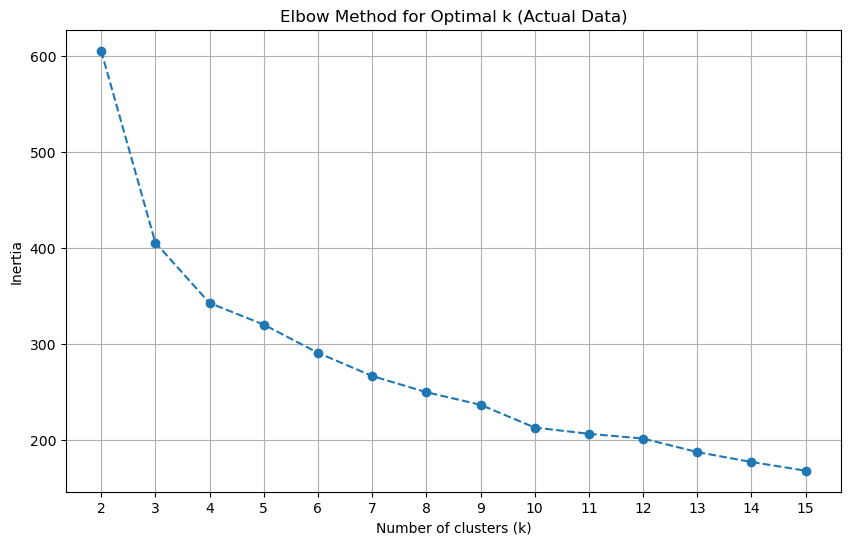

In [12]:

# 스케일링 + 클러스터링
features = ['공격WAR', '루타', '타점', 'WPA+','득점','WPA','타석수','wRC+','안타','타수','2루타','홈런','국대출전횟수']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

inertia = []
K_range = range(2, 16) # k를 2부터 15까지 테스트

for k in K_range:
    # n_init='auto'로 설정하여 경고 메시지가 뜨지 않도록 합니다.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 4. 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (Actual Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()



In [ ]:
#k= 4

## 적절한 PCA 수 찾기

--- [구원 투수] 주성분별 설명 분산 및 누적 분산 ---
      Explained Variance  Cumulative Variance
PC1             0.780461             0.780461
PC2             0.077373             0.857834
PC3             0.060202             0.918037
PC4             0.027369             0.945405
PC5             0.015711             0.961116
PC6             0.013383             0.974499
PC7             0.010505             0.985004
PC8             0.007955             0.992959
PC9             0.003271             0.996231
PC10            0.002208             0.998439
PC11            0.001386             0.999825
PC12            0.000131             0.999956
PC13            0.000044             1.000000


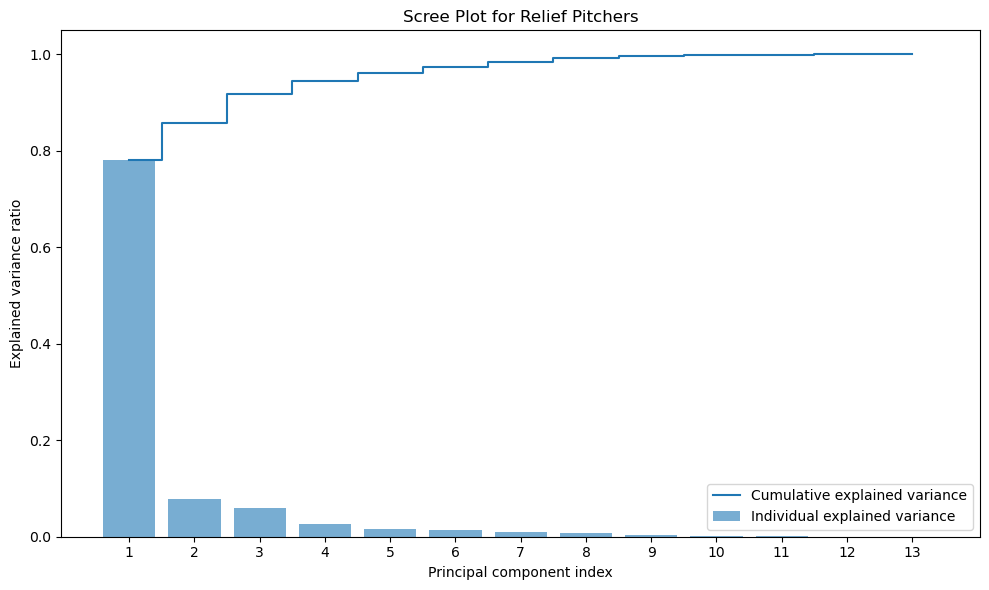

In [13]:


# 1. 분석할 피처 선택 및 스케일링
features =['공격WAR', '루타', '타점', 'WPA+','득점','WPA','타석수','wRC+','안타','타수','2루타','홈런','국대출전횟수']
X_batter = df[features]
scaler_batter = StandardScaler()
X_batter_scaled = scaler_batter.fit_transform(X_batter)

# 2. PCA 실행 (모든 주성분 계산)
pca_batter = PCA()
pca_batter.fit(X_batter_scaled)

# 3. 누적 설명 분산 계산
explained_variance_batter = pca_batter.explained_variance_ratio_
cumulative_variance_batter = np.cumsum(explained_variance_batter)

print("--- [구원 투수] 주성분별 설명 분산 및 누적 분산 ---")
pc_df = pd.DataFrame({
    'Explained Variance': explained_variance_batter,
    'Cumulative Variance': cumulative_variance_batter
}, index=[f'PC{i+1}' for i in range(len(explained_variance_batter))])
print(pc_df)


# 4. 스크리 그림(Scree Plot) 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_batter) + 1), explained_variance_batter, alpha=0.6, label='Individual explained variance')
plt.step(range(1, len(explained_variance_batter) + 1), cumulative_variance_batter, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot for Relief Pitchers')
plt.xticks(range(1, len(explained_variance_batter) + 1))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

원본 13개 피처가 3개의 주성분으로 변환되었습니다.
각 주성분의 설명 분산(정보량): [0.78046089 0.07737328 0.06020236]
총 설명 분산: 0.92


C:\Users\woowo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


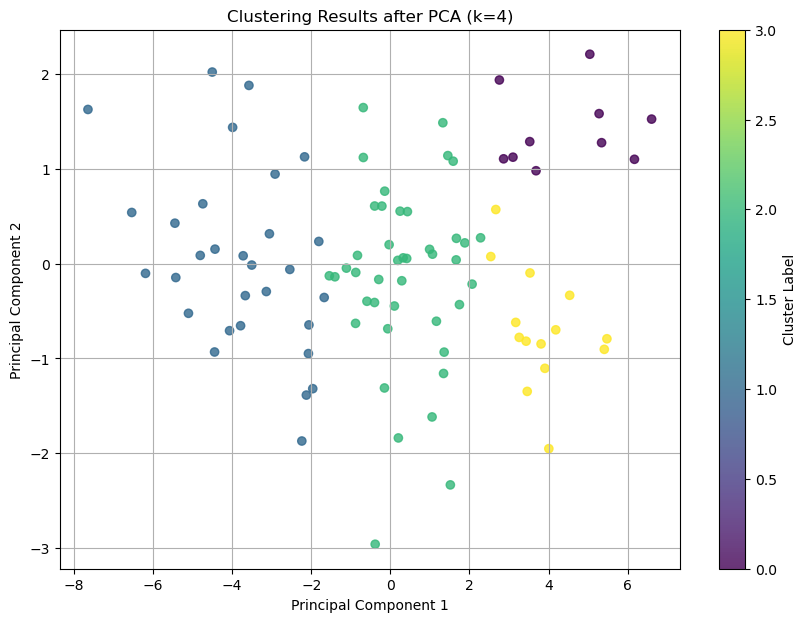

In [14]:

from sklearn.decomposition import PCA




# 1. PCA 변환
# 주성분 개수를 개로 설정(>91%)
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"원본 {X_scaled.shape[1]}개 피처가 {pca.n_components_}개의 주성분으로 변환되었습니다.")
print(f"각 주성분의 설명 분산(정보량): {pca.explained_variance_ratio_}")
print(f"총 설명 분산: {sum(pca.explained_variance_ratio_):.2f}")


# 2. PCA 데이터로 K-평균 군집분석 실행
# k=4로 설정하여 군집화
n_clusters = 4
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

# 결과를 데이터프레임에 새로운 컬럼으로 추가
df['pca_cluster'] = kmeans_pca.fit_predict(X_pca)


# 3. 결과 시각화
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['pca_cluster'], cmap='viridis', alpha=0.8)

# 각 점에 선수 이름 표시 (선택 사항 - 데이터가 많으면 지저분해 보일 수 있음)
# for i, name in enumerate(df_filtered['선수명']):
#     plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=9)

plt.title('Clustering Results after PCA (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


## 클러스터링

--- 주성분 적재(PCA Loadings) ---
             PC1       PC2       PC3
공격WAR   0.279666  0.182379  0.120951
루타      0.310450  0.013566 -0.076844
타점      0.291870  0.218620 -0.089108
WPA+    0.301799 -0.095589 -0.036540
득점      0.286988 -0.199012  0.010789
WPA     0.280144  0.258185  0.037501
타석수     0.292510 -0.298435 -0.107655
wRC+    0.260372  0.416165  0.023490
안타      0.294254 -0.297361 -0.118790
타수      0.289026 -0.336363 -0.135062
2루타     0.286951 -0.141534 -0.156718
홈런      0.239783  0.534178  0.033295
국대출전횟수  0.158051 -0.184817  0.947895


C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\woowo\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  f

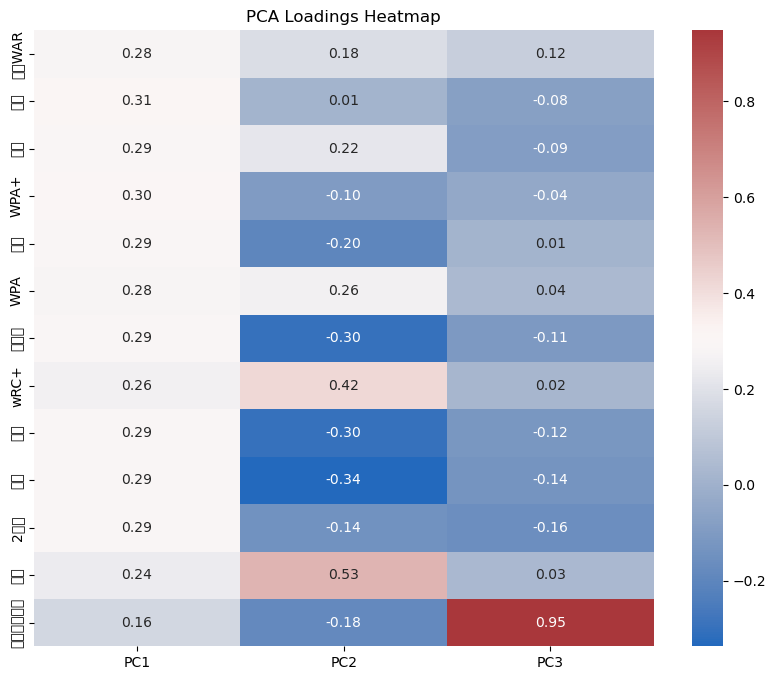

In [15]:
# 1. 주성분 적재(PCA Loadings)를 데이터프레임으로 변환
# pca.components_ 속성에 각 주성분의 적재값이 들어있습니다.
loadings_df = pd.DataFrame(
    data=pca.components_.T,  # T를 붙여 행과 열을 바꿉니다.
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=features
)

print("--- 주성분 적재(PCA Loadings) ---")
print(loadings_df)


# 2. 히트맵(Heatmap)으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, annot=True, fmt='.2f', cmap='vlag')
plt.title('PCA Loadings Heatmap')
plt.show()


In [11]:
#kmeans = KMeans(n_clusters=4, random_state=42)
#df['cluster_label'] = kmeans.fit_predict(X_scaled)

In [16]:
df['pca_cluster'].unique()

array([0, 2, 1, 3])

### 클러스터 0

In [29]:
# '클러스터 0'에 속한 선수들만 필터링
cluster_0_players = df[df['pca_cluster'] == 0]

# 선수 이름(player_name)과 주요 특징(features)을 함께 출력
print(cluster_0_players[['FA년도']+['선수명'] + features])

# 만약 선수 이름만 보고 싶다면
# print(cluster_0_players['player_name'])

    FA년도  선수명     공격WAR          루타          타점       WPA+         득점  \
0   2018  강민호  4.720000  224.000000   75.333333  11.043333  63.333333   
19  2022  김재환  4.922500  263.500000  109.750000  12.280000  87.000000   
25  2022  나성범  3.350000  237.750000   79.500000  10.307500  85.000000   
35  2022  박병호  3.742500  211.000000   88.000000   9.935000  71.000000   
48  2019  양의지  4.937500  207.500000   75.750000   9.850000  66.750000   
49  2023  양의지  5.770000  254.000000  109.666667  11.760000  76.000000   
52  2021  오재일  3.382500  226.250000   90.000000  10.380000  67.250000   
84  2019   최정  4.683333  268.666667   97.666667  11.490000  96.666667   
88  2017  최형우  5.637500  299.000000  116.250000  12.707500  91.250000   
89  2021  최형우  5.170000  273.000000  101.333333  13.833333  83.333333   

         WPA         타석수        wRC+          안타          타수        2루타  \
0   3.606667  477.000000  137.500000  123.666667  405.666667  22.000000   
19  3.365000  589.000000  146.875000  145.7500

### 클러스터 1

In [27]:
# '클러스터 1'에 속한 선수들만 필터링
cluster_1_players = df[df['pca_cluster'] == 1]

# 선수 이름(player_name)과 주요 특징(features)을 함께 출력
print(cluster_1_players[['FA년도']+['선수명'] + features])

# 만약 선수 이름만 보고 싶다면
# print(cluster_0_players['player_name'])

    FA년도  선수명     공격WAR          루타         타점      WPA+         득점       WPA  \
2   2024  강한울  0.462500   62.000000  18.250000  3.262500  24.750000 -0.545000   
3   2024  고종욱  0.212500   77.750000  24.250000  4.305000  24.250000  0.200000   
5   2023  권희동  1.295000  101.000000  34.750000  5.382500  39.750000  0.727500   
6   2020  김강민  0.840000  114.666667  38.000000  5.146667  41.666667 -0.030000   
8   2024  김민성  0.612500   96.250000  36.750000  4.650000  28.500000 -0.615000   
9   2024  김민식  0.680000   71.750000  27.250000  4.125000  27.500000 -0.607500   
10  2019  김상수  0.875000  131.000000  41.000000  6.112500  50.750000 -0.592500   
11  2023  김상수  1.230000  122.333333  39.333333  6.580000  49.000000 -0.453333   
14  2021  김성현  0.610000  135.000000  39.333333  6.113333  47.000000 -1.130000   
15  2024  김성현  0.766667   94.333333  33.666667  5.693333  33.333333 -0.780000   
16  2021  김용의 -0.247500   42.000000  12.500000  2.380000  27.000000 -0.340000   
21  2020  김태군  0.140000   75

### 클러스터 2

In [28]:
# '클러스터 2'에 속한 선수들만 필터링
cluster_2_players = df[df['pca_cluster'] == 2]

# 선수 이름(player_name)과 주요 특징(features)을 함께 출력
print(cluster_2_players[['FA년도']+['선수명'] + features])

# 만약 선수 이름만 보고 싶다면
# print(cluster_2_players['player_name'])

    FA년도  선수명     공격WAR          루타         타점       WPA+         득점  \
1   2022  강민호  2.706667  169.000000  57.666667   8.010000  45.666667   
7   2019  김민성  1.830000  210.000000  71.000000   9.042500  60.250000   
12  2020  김선빈  2.692500  136.000000  38.250000   6.715000  53.750000   
13  2024  김선빈  3.203333  176.000000  58.666667  10.830000  49.000000   
17  2017  김재호  2.255000  139.000000  53.500000   6.780000  56.000000   
18  2021  김재호  3.133333  155.666667  54.000000   7.700000  59.000000   
23  2020  김태균  1.553333  162.000000  57.333333   8.230000  41.000000   
26  2017  나지완  3.135000  185.000000  74.000000   9.862500  59.750000   
27  2023  노진혁  3.032500  171.000000  64.500000   7.630000  53.000000   
32  2019  박경수  2.823333  205.333333  73.333333  10.043333  63.666667   
33  2023  박동원  2.780000  159.250000  61.250000   7.495000  52.000000   
34  2023  박민우  3.237500  156.500000  41.000000   7.772500  65.500000   
36  2020  박석민  1.686667  150.666667  61.666667   7.993333  44.00

### 클러스터 3

In [30]:
# '클러스터 3'에 속한 선수들만 필터링
cluster_3_players = df[df['pca_cluster'] == 3]

# 선수 이름(player_name)과 주요 특징(features)을 함께 출력
print(cluster_3_players[['FA년도']+['선수명'] + features])

# 만약 선수 이름만 보고 싶다면
# print(cluster_3_players['player_name'])

    FA년도  선수명     공격WAR          루타          타점       WPA+          득점  \
4   2022  구자욱  3.107500  240.250000   80.250000  11.572500   85.750000   
20  2018  김주찬  2.655000  224.750000   69.750000  10.022500   78.250000   
24  2022  김현수  3.990000  245.333333   99.000000  12.533333   81.000000   
30  2018  민병헌  2.930000  224.000000   78.000000  10.622500   84.000000   
31  2022  박건우  3.872500  219.000000   70.250000  10.452500   86.750000   
38  2019  박용택  2.673333  240.333333   85.333333  12.756667   85.333333   
41  2018  손아섭  4.490000  258.750000   73.750000  12.807500  105.500000   
42  2022  손아섭  3.336667  228.666667   68.666667  12.023333   88.000000   
59  2021  이대호  2.106667  259.333333  107.666667  12.863333   65.333333   
73  2024  전준우  3.533333  233.333333   79.000000  11.860000   80.333333   
74  2018  정근우  3.557500  215.500000   60.750000  11.410000   96.000000   
90  2024  최형우  3.290000  200.500000   76.000000  11.755000   59.500000   
94  2017  황재균  2.927500  245.750000   

### 클러스터별 피쳐들의 평균값

In [22]:
# 클러스터별 각 feature의 평균값 확인
cluster_means = df.groupby('pca_cluster')[features].mean()
print(cluster_means)

                공격WAR          루타         타점       WPA+         득점       WPA  \
pca_cluster                                                                    
0            4.631583  246.466667  94.325000  11.358667  78.758333  3.383833   
1            0.702278   96.144444  32.136111   4.727461  33.541667 -0.284583   
2            2.333988  173.940476  60.672619   8.431825  56.736111  1.113214   
3            3.293810  232.726190  79.089286  11.697143  83.172619  2.822619   

                    타석수        wRC+          안타          타수        2루타  \
pca_cluster                                                              
0            521.916667  147.446667  137.166667  446.525000  25.816667   
1            301.105556   84.289722   69.763889  264.688889  11.294444   
2            454.817460  110.695833  116.361111  398.019841  19.648810   
3            557.482143  126.407738  154.172619  491.279762  29.053571   

                    홈런    국대출전횟수  
pca_cluster                       
0   

# 클러스터 별 선수들의 1년차 성적 변화 확인

In [23]:
# '구분' 컬럼이 'FA 1년차'인 로우들만 필터링합니다.
df_1 = df_batter[df_batter['구분'] == 'FA 1년차'].copy()


In [24]:
df_1

,FA년도,구단명,선수명,포지션,투,타,구분,FA등급,플레이년도,나이,...,7번 타순,8번 타순,9번 타순,메인 타순,볼삼비,루타,장타율,출루율,OPS,GPA
212,2017,두산,김재호,SS,우투,우타,FA 1년차,B,2017,32,...,81.0,0.0,196.0,9.0,0.692308,124,0.530,0.371,0.901,0.29945
217,2017,KIA,나지완,DH,우투,우타,FA 1년차,A,2017,32,...,9.0,6.0,2.0,5.0,0.590476,245,0.643,0.405,1.048,0.34300
218,2017,롯데,이대호,1B,우투,우타,FA 1년차,B,2017,35,...,0.0,0.0,0.0,4.0,0.595238,288,0.620,0.391,1.011,0.33095
222,2017,삼성,이원석,3B,우투,우타,FA 1년차,B,2017,31,...,126.0,23.0,2.0,6.0,0.425000,185,0.545,0.323,0.868,0.28160
226,2017,KT,이진영,DH,좌투,좌타,FA 1년차,A,2017,37,...,23.0,16.0,6.0,2.0,0.500000,110,0.529,0.335,0.864,0.28300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,2024,SSG,이지영,C,우투,우타,FA 1년차,B,2024,38,...,102.0,145.0,15.0,8.0,0.514286,139,0.392,0.320,0.712,0.24200
643,2024,롯데,전준우,DH,우투,우타,FA 1년차,B,2024,38,...,9.0,0.0,0.0,4.0,0.583333,205,0.591,0.369,0.960,0.31380
644,2021,KIA,최형우,DH,우투,좌타,FA 1년차,FA 1년차,2021,38,...,1.0,1.0,0.0,4.0,1.000000,140,0.375,0.354,0.730,0.25305
647,2024,KIA,최형우,DH,우투,좌타,FA 1년차,FA 1년차,2024,41,...,1.0,3.0,0.0,4.0,0.604651,212,0.609,0.361,0.970,0.31470


In [25]:
fa_performance_columns = ['공격WAR', '루타', '타점', 'WPA+','득점','WPA','타석수','wRC+','안타','타수','2루타','홈런','국대출전횟수']
result_df = pd.DataFrame()

# 3. 각 군집(0~4)에 대해 반복 작업 수행
# df_relief['pca_cluster'].unique()를 통해 실제 존재하는 군집 번호만 가져옵니다.
for cluster_num in sorted(df['pca_cluster'].unique()):
    
    # 3-1. 현재 군집에 속한 선수들의 이름만 가져오기
    players_in_cluster = df[df['pca_cluster'] == cluster_num]['선수명']
    
    # 3-2. 'FA 1년차' 데이터에서 해당 선수들의 기록만 필터링
    fa_stats_of_cluster = df_1[df_1['선수명'].isin(players_in_cluster)]
    
    # 3-3. 필터링된 선수들의 평균 성적 계산
    mean_stats = fa_stats_of_cluster[fa_performance_columns].mean()
    
    # 3-4. 계산된 평균 성적을 결과 데이터프레임에 추가
    result_df[f'Cluster {cluster_num}'] = mean_stats

### 클러스터 별 FA 1년차 성적 평균

In [26]:
print(result_df.T)

              공격WAR          루타         타점       WPA+         득점       WPA  \
Cluster 0  3.908333  220.333333  85.000000  10.910000  66.333333  2.317500   
Cluster 1  0.551290   74.161290  25.870968   3.493548  25.548387 -0.479677   
Cluster 2  1.673111  145.755556  52.688889   7.322667  45.822222  0.500222   
Cluster 3  2.723158  216.894737  78.473684  10.397895  69.368421  2.072105   

                  타석수        wRC+          안타          타수        2루타  \
Cluster 0  516.250000  135.550000  128.833333  443.750000  23.583333   
Cluster 1  233.612903   72.670968   52.741935  204.354839   8.645161   
Cluster 2  399.444444   93.648889   95.466667  350.977778  17.511111   
Cluster 3  514.842105  120.521053  137.368421  454.894737  24.578947   

                  홈런    국대출전횟수  
Cluster 0  22.083333  3.916667  
Cluster 1   3.870968  0.612903  
Cluster 2  10.288889  1.422222  
Cluster 3  17.157895  3.894737  


In [ ]:
                공격WAR          루타         타점       WPA+         득점       WPA  \
pca_cluster                                                                    
0            4.631583  246.466667  94.325000  11.358667  78.758333  3.383833   
1            0.702278   96.144444  32.136111   4.727461  33.541667 -0.284583   
2            2.333988  173.940476  60.672619   8.431825  56.736111  1.113214   
3            3.293810  232.726190  79.089286  11.697143  83.172619  2.822619   

                    타석수        wRC+          안타          타수        2루타  \
pca_cluster                                                              
0            521.916667  147.446667  137.166667  446.525000  25.816667   
1            301.105556   84.289722   69.763889  264.688889  11.294444   
2            454.817460  110.695833  116.361111  398.019841  19.648810   
3            557.482143  126.407738  154.172619  491.279762  29.053571   

                    홈런    국대출전횟수  
pca_cluster                       
0            27.200000  3.800000  
1             4.497222  0.600000  
2            11.700397  1.452381  
3            15.035714  3.857143

In [31]:
df_new_players = pd.read_csv('26년FA_야수_ver2.csv')

In [32]:
df_new = df_new_players.copy()

In [33]:
# 2. 성과 지표 평균 처리
performance_cols_new = [ '공격WAR', '루타', '타점', 'WPA+','득점','WPA','타석수','wRC+','안타','타수','2루타','홈런','국대출전횟수']  # 평균 낼 컬럼들로 수정

df_new = df_new.groupby('선수명')[performance_cols_new].mean().reset_index()




In [34]:
df_new

,선수명,공격WAR,루타,타점,WPA+,득점,WPA,타석수,wRC+,안타,타수,2루타,홈런,국대출전횟수
0,강민호,2.5075,167.25,67.75,8.7000,42.25,0.9850,421.50,110.600,105.75,374.00,18.50,14.00,8.0
1,강백호,0.8775,130.00,47.25,6.0700,41.00,0.1700,332.75,102.925,80.25,296.75,14.00,11.75,4.0
2,김재환,1.9950,175.00,62.00,9.4300,54.25,1.3725,472.25,118.000,101.00,403.75,19.25,17.75,2.0
3,박병호,1.5975,167.75,72.00,8.0950,50.50,1.8075,394.25,119.325,88.75,342.25,10.75,22.75,5.0
4,박승욱,0.8925,80.50,24.75,4.3750,32.00,-0.3875,270.25,62.600,60.00,234.00,11.50,2.00,0.0
5,박찬호,3.0075,163.25,46.00,9.2225,71.50,0.7575,504.50,102.525,130.25,444.50,19.25,3.75,0.0
6,박해민,2.1475,162.75,47.25,9.0250,73.75,-0.2550,525.75,101.225,125.75,456.50,14.50,4.50,3.0
7,손아섭,1.5725,167.00,49.00,8.5075,58.75,0.9500,462.00,105.600,126.50,418.00,23.50,4.00,5.0
8,이재원,-0.2325,32.50,13.25,1.6925,10.25,-0.9650,146.50,20.450,25.50,126.25,2.75,1.25,2.0
9,장성우,2.8200,155.75,60.00,8.1500,41.50,0.6100,422.25,108.050,98.75,365.75,15.75,13.75,0.0


In [36]:
new_X = df_new[features]

# 1. 기존 스케일러로 변환
new_X_scaled = scaler_batter.transform(new_X)

# 2. 기존 PCA로 변환
new_X_pca = pca.transform(new_X_scaled)

# 3. 기존 KMeans로 예측
new_clusters = kmeans_pca.predict(new_X_pca)

# 4. 결과를 새로운 데이터프레임에 추가
df_new['pca_cluster_new'] = new_clusters

# 결과 확인
print(df_new.head())

   선수명   공격WAR      루타     타점   WPA+     득점     WPA     타석수     wRC+      안타  \
0  강민호  2.5075  167.25  67.75  8.700  42.25  0.9850  421.50  110.600  105.75   
1  강백호  0.8775  130.00  47.25  6.070  41.00  0.1700  332.75  102.925   80.25   
2  김재환  1.9950  175.00  62.00  9.430  54.25  1.3725  472.25  118.000  101.00   
3  박병호  1.5975  167.75  72.00  8.095  50.50  1.8075  394.25  119.325   88.75   
4  박승욱  0.8925   80.50  24.75  4.375  32.00 -0.3875  270.25   62.600   60.00   

       타수    2루타     홈런  국대출전횟수  pca_cluster_new  
0  374.00  18.50  14.00     8.0                2  
1  296.75  14.00  11.75     4.0                1  
2  403.75  19.25  17.75     2.0                2  
3  342.25  10.75  22.75     5.0                2  
4  234.00  11.50   2.00     0.0                1  


In [37]:
# '클러스터 0'에 속한 선수들만 필터링
cluster_0_players_new = df_new[df_new['pca_cluster_new'] == 0]

# 선수 이름(player_name)과 주요 특징(features)을 함께 출력
print(cluster_0_players_new[['선수명'] + features])

    선수명  공격WAR     루타     타점   WPA+    득점  WPA    타석수   wRC+     안타      타수  \
13  최형우  3.035  196.5  79.25  10.95  59.5  3.1  471.0  146.6  117.5  403.25   

     2루타    홈런  국대출전횟수  
13  25.5  17.0     1.0  


In [38]:
# '클러스터 1'에 속한 선수들만 필터링
cluster_1_players_new = df_new[df_new['pca_cluster_new'] == 1]

# 선수 이름(player_name)과 주요 특징(features)을 함께 출력
print(cluster_1_players_new[['선수명'] + features])

    선수명   공격WAR      루타     타점    WPA+     득점     WPA     타석수     wRC+     안타  \
1   강백호  0.8775  130.00  47.25  6.0700  41.00  0.1700  332.75  102.925  80.25   
4   박승욱  0.8925   80.50  24.75  4.3750  32.00 -0.3875  270.25   62.600  60.00   
8   이재원 -0.2325   32.50  13.25  1.6925  10.25 -0.9650  146.50   20.450  25.50   
10   정훈  0.2025   89.25  30.25  4.8025  31.00  0.0425  270.75   85.300  61.00   
11  조수행 -0.0975   51.50  15.00  3.4650  38.00 -0.1600  211.75   62.825  44.75   

        타수    2루타     홈런  국대출전횟수  
1   296.75  14.00  11.75     4.0  
4   234.00  11.50   2.00     0.0  
8   126.25   2.75   1.25     2.0  
10  238.00  13.25   5.00     0.0  
11  184.00   3.25   0.50     0.0  


In [39]:
# '클러스터 2'에 속한 선수들만 필터링
cluster_2_players_new = df_new[df_new['pca_cluster_new'] == 2]

# 선수 이름(player_name)과 주요 특징(features)을 함께 출력
print(cluster_2_players_new[['선수명'] + features])



    선수명   공격WAR      루타     타점    WPA+     득점     WPA     타석수     wRC+  \
0   강민호  2.5075  167.25  67.75  8.7000  42.25  0.9850  421.50  110.600   
2   김재환  1.9950  175.00  62.00  9.4300  54.25  1.3725  472.25  118.000   
3   박병호  1.5975  167.75  72.00  8.0950  50.50  1.8075  394.25  119.325   
5   박찬호  3.0075  163.25  46.00  9.2225  71.50  0.7575  504.50  102.525   
6   박해민  2.1475  162.75  47.25  9.0250  73.75 -0.2550  525.75  101.225   
7   손아섭  1.5725  167.00  49.00  8.5075  58.75  0.9500  462.00  105.600   
9   장성우  2.8200  155.75  60.00  8.1500  41.50  0.6100  422.25  108.050   
12  최원준  1.3825  138.00  35.50  7.3950  55.50  0.5125  423.25   92.575   
14  황재균  1.3875  157.25  48.00  7.9975  51.75  0.2425  453.00   95.650   

        안타      타수    2루타     홈런  국대출전횟수  
0   105.75  374.00  18.50  14.00     8.0  
2   101.00  403.75  19.25  17.75     2.0  
3    88.75  342.25  10.75  22.75     5.0  
5   130.25  444.50  19.25   3.75     0.0  
6   125.75  456.50  14.50   4.50     3.0  
7

In [40]:
# '클러스터 3'에 속한 선수들만 필터링
cluster_3_players_new = df_new[df_new['pca_cluster_new'] == 3]

# 선수 이름(player_name)과 주요 특징(features)을 함께 출력
print(cluster_3_players_new[['선수명'] + features])

Empty DataFrame
Columns: [선수명, 공격WAR, 루타, 타점, WPA+, 득점, WPA, 타석수, wRC+, 안타, 타수, 2루타, 홈런, 국대출전횟수]
Index: []
